In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2

In [6]:
dist_pickle=pickle.load(open("wide_dist_pickle.p","rb"))
mtx=dist_pickle['mtx']
dist=dist_pickle['dist']

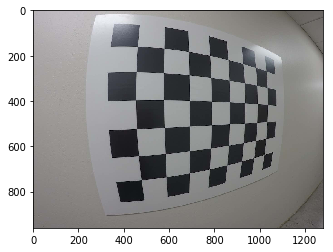

In [18]:
img=image.imread('test_image2.png')
nx=8
ny=6
plt.imshow(img)

In [33]:
%matplotlib qt
def corners_unrap(img,nx,ny,mtx,dist):
    undist_img=cv2.undistort(img,mtx,dist,None,mtx)
    gray=cv2.cvtColor(undist_img,cv2.COLOR_RGB2GRAY)
    print(gray.shape[::-1])
    ret,corners=cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M
    #return undist_img

In [31]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

NameError: name 'corners_unwarp' is not defined

In [34]:
corners_unrap(img,nx,ny,mtx,dist)
#plt.imshow(im)

(1280, 960)


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\calib3d\src\calibinit.cpp:502: error: (-2:Unspecified error) in function 'bool __cdecl cv::findChessboardCorners(const class cv::_InputArray &,class cv::Size_<int>,const class cv::_OutputArray &,int)'
> Only 8-bit grayscale or color images are supported:
>     'depth == CV_8U && (cn == 1 || cn == 3 || cn == 4)'
> where
>     'type' is 5 (CV_32FC1)
